# Реализация частотного конвертора

In [2]:
import numpy as np
import scipy
from scipy.fft import fft, ifft, rfft, irfft
from scipy.signal import fftconvolve
import IPython.display as ipd
from IPython import display
import librosa
from librosa import display
import matplotlib.pyplot as plt

**Задача:**
- реализовать преобразование, сопоставляющее входному дискретному сигналу *x*, с частотой дискретизации *N_1*, выходной сигнал *y* с частотой дискретизации *N_2*

**Алгоритм:**
- растяжение сигнала
- фильтрация сигнала
- прореживание

## V1

Реализуем алгоритм последовательно в функции `frequency_converter_by_fft`

In [14]:
def frequency_converter_by_fft(audio, sr, target_sr):
    
    # Растяжение
    n = target_sr * len(audio)
    x_hidden, x_hidden[np.arange(n) % target_sr == 0] =  np.zeros(n), audio
    
    # Фильтрация в частотной области с помощью теоремы о свертке
#     h, h[:target_sr] = np.zeros(n), sr
    h, h[:target_sr * len(audio) // sr] = np.zeros(n), sr
    y = ifft(fft(x_hidden) * h)
    
    # Прореживание
    y = y[::sr]
    
    return y

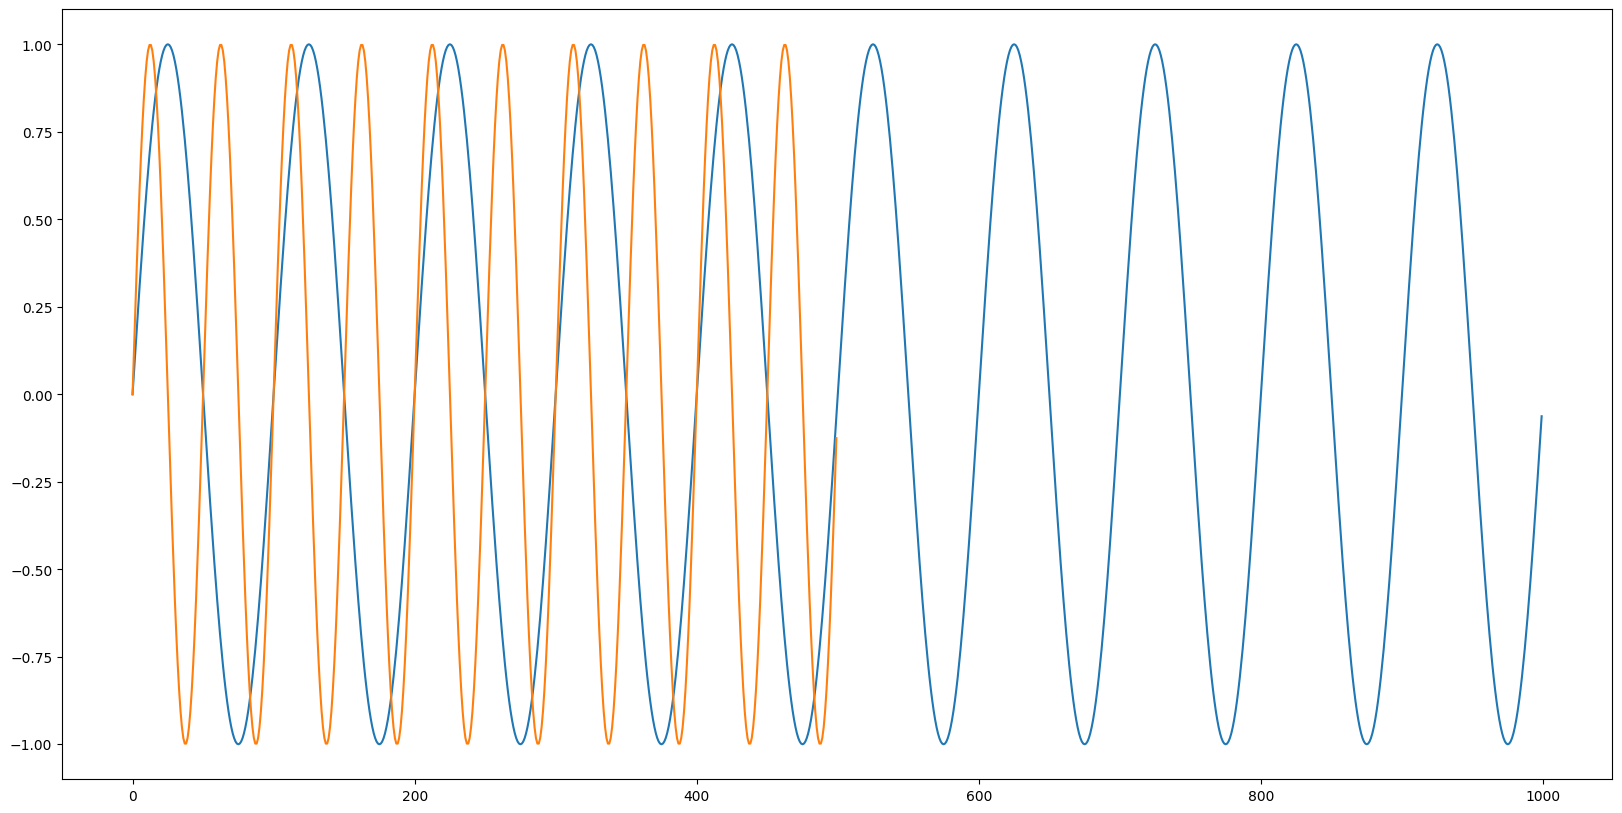

In [20]:
N1 = 1000
t = np.arange(0, 1, 1/N1)
signal_sin = np.sin(2*np.pi*10*t) # + np.sin(2*np.pi*30*t)
plt.figure(figsize=(20, 10))

plt.plot(signal_sin)

N2 = 500
t2 = np.arange(0, 1, 1/N2)
signal_sin2 = np.sin(2*np.pi*10*t2)
plt.plot(frequency_converter_by_fft(signal_sin, N1, N2))

Однако благодаря подсказке моего одногруппника - *Александра Зубакова*, было замечено, что в данном алгоритме можно упростить операцию свертки. В блоке кода ниже можно увидеть исходный массив после растяжения, а также после использования операции свертки.

In [15]:
n_ = 10
t_sr = 4
sr = 5
x = np.random.randint(6, size=n_)
print('Исходный массив: ', x)
n = t_sr * len(x)
x_, x_[np.arange(n) % t_sr == 0] =  np.zeros(n), x
print("Массив после растяжения: ", x_)
print("Массив после фильтрации: ", np.convolve(x_, np.ones(t_sr)))
print("Массив после фильтрации в частотной области: ", np.around(np.abs(fftconvolve(x_, np.ones(t_sr)))))

Исходный массив:  [5 5 2 5 2 3 3 2 1 0]
Массив после растяжения:  [5. 0. 0. 0. 5. 0. 0. 0. 2. 0. 0. 0. 5. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0.
 3. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Массив после фильтрации:  [5. 5. 5. 5. 5. 5. 5. 5. 2. 2. 2. 2. 5. 5. 5. 5. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 2. 2. 2. 2. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
Массив после фильтрации в частотной области:  [5. 5. 5. 5. 5. 5. 5. 5. 2. 2. 2. 2. 5. 5. 5. 5. 2. 2. 2. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 2. 2. 2. 2. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


Таким образом, можно `переписать` алгоритм в более *компактном* виде, повысив его *производительность*:

## V2

In [97]:
def frequency_converter_opt(audio, sr, target_sr):
    return np.repeat(audio, target_sr)[::sr]

## Результат работы

Загрузим речь Ленина и выполним преобразование с помощью частотного конвертера:

In [5]:
audio, sr = librosa.load('resources/lenin-obraschenie.wav', duration=20)

In [6]:
# Исходная частота дискретизации
print(sr)

22050


In [7]:
ipd.Audio(audio, rate=sr)

In [7]:
# Частота дискретизации после преобразования
target_sr = 16_000

In [9]:
%%time
y_ = frequency_converter_opt(audio, sr, target_sr)

CPU times: total: 44.9 s
Wall time: 45.9 s


In [10]:
ipd.Audio(y_, rate=target_sr)

In [8]:
audio2 = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

## V3

In [9]:
def frequency_converter_opt(audio, sr, target_sr):
    return np.repeat(audio, target_sr)[::sr]

In [10]:
%%time
y_ = frequency_converter_opt(audio2, target_sr, sr)

CPU times: total: 29.8 s
Wall time: 30 s


In [12]:
ipd.Audio(y_, rate=sr)

In [13]:
len(y_), len(audio2), len(audio)

(441000, 320000, 441000)